# Problem

According to the CDC, "About 42,000 women and 500 men in the U.S. die each year from breast cancer". The National Breast Cancer Foundation notes that early detection of breast cancer increases the 5-year relative survival rate to 99%.

The objective is to train a classifier to predict whether a breast mass is malignant or benign based on imaging's cell nuclei features in order to assist with early detection and increase the survival rate of individuals with breast cancer.

This problem is a binary classification problem because the model will need to detect whether a mass is malignant or benign.

The classifier will be a binary supervised learning classifier that uses the Breast Cancer Wisconsin (Diagnostic) dataset to learn the relationships between characteristics of cells taken from breast masses to malignant and benign masses.



*Citations*

*Breast cancer early detection*. National Breast Cancer Foundation. https://www.nationalbreastcancer.org/early-detection-of-breast-cancer/

 *Basic information about breast cancer*. Centers for Disease Control and Prevention. https://www.cdc.gov/cancer/breast/basic_info/index.htm

In [51]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

#data prep
from sklearn.model_selection import train_test_split

#models
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#model comparison metrics
from sklearn.metrics import precision_recall_fscore_support

#set seed
random.seed(1999)

%matplotlib inline


## About the Dataset

The dataset is known as the Breast Cancer Wisconsin (Diagnostic) dataset and was uploaded to Kaggle by the user M .Yasser H. It is a CSV document with 30 feature columns related to characteristics of cells taken from breast masses as well as a target column denoting whether the mass was found to be malignant ('M') or benign ('B'). The total sample size is 569.

The features of the cells include measurements of compactness, smoothness, radius, perimeter, area, concavity, fractal dimension, and texture.  

You can find the dataset used in this notebook here: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/

You can read more details about the data at the UC Irvine Machine Learning Repository here: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

The feature extraction was originally introduced in the paper "Nuclear feature extraction for breast tumor diagnosis" by authors W. Nick street, William H. Wolberg, and O. L. Mangasarian published in *Electronic Imaging* in 1993. For details regarding the features used in this dataset you can access the paper here: https://www.semanticscholar.org/paper/Nuclear-feature-extraction-for-breast-tumor-Street-Wolberg/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36

In [52]:
# load the dataset csv document into a data frame

df = pd.read_csv('./breast-cancer.csv', index_col="id")

#review of datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [53]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Cleaning the Dataset

In order to prepare the data for the models we can convert the diagnosis target feature to 1's and 0's as opposed to the strings 'M' and 'B' as this is a binary classification problem.

There are no nulls in our dataset so we do not need to remove any samples due to nulls. The summary statistics of the data shows a potential outlier related to area features based on the difference between its max value $2501$ and the 75th percentile value, $782.7$.

We can see the distribution of the data better in the boxplot below.

[Text(0.5, 1.0, 'Distribution of area_worst')]

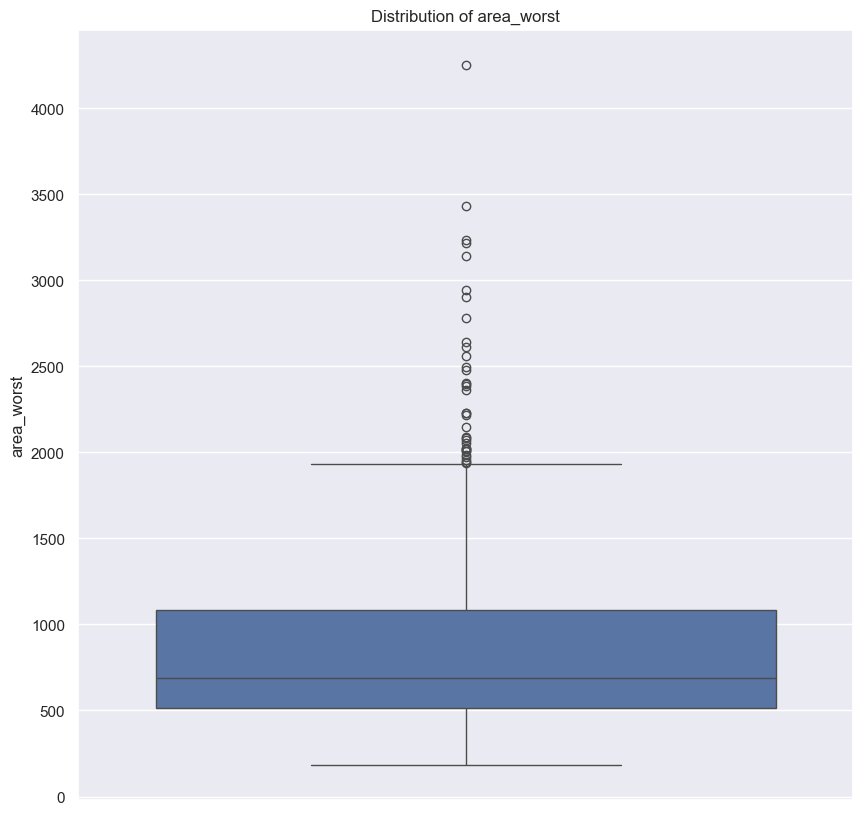

In [54]:
# Convert target labels to binary (1,0)
# 1 equals Malignant (M) classification and 0 equals Benign (B)
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)

sns.boxplot(y=df['area_worst'],  data=df).set(title="Distribution of area_worst")

While it might be tempting to remove the outliers, considering our problem of detecting malignant masses, large area sizes may be related to cancerous growth.

If we filter the dataset to only include samples with an area_mean that is greater than the 75th percentile we can see that the diagnosis tends to be 'M' as below.

Therefore, it would not be prudent to remove these outliers as they likely contain crucial information for our models to learn.

Accordingly, we can continue to the next steps without removing any samples.


In [55]:
area_mean_above_75_percentile = df.loc[df['area_mean'] > 782.700000]
area_mean_above_75_percentile

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84358402,1,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
844359,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926125,1,20.92,25.09,143.0,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
926424,1,21.56,22.39,142.0,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


# Further Exploring the Dataset

The dataset consists of 569 samples and 30 feature columns of the data type float64. As mentioned above, there is one target column, 'diagnosis' which is a string that notes whether the sample is malignant (M) or benign (B).

The dataset can be described as medium-sized, given the number of samples, as well as dense as each feature has a float value and there are no nulls.

Something I noticed early on was that certain feature columns appear to denote various calculated statistics of the same feature (e.g. there is a radius_mean and a radius_se.) This strongly suggested to me that some features may correlate with one another. In order to explore this, I decided to create a heatmap and pairplot.

<Axes: >

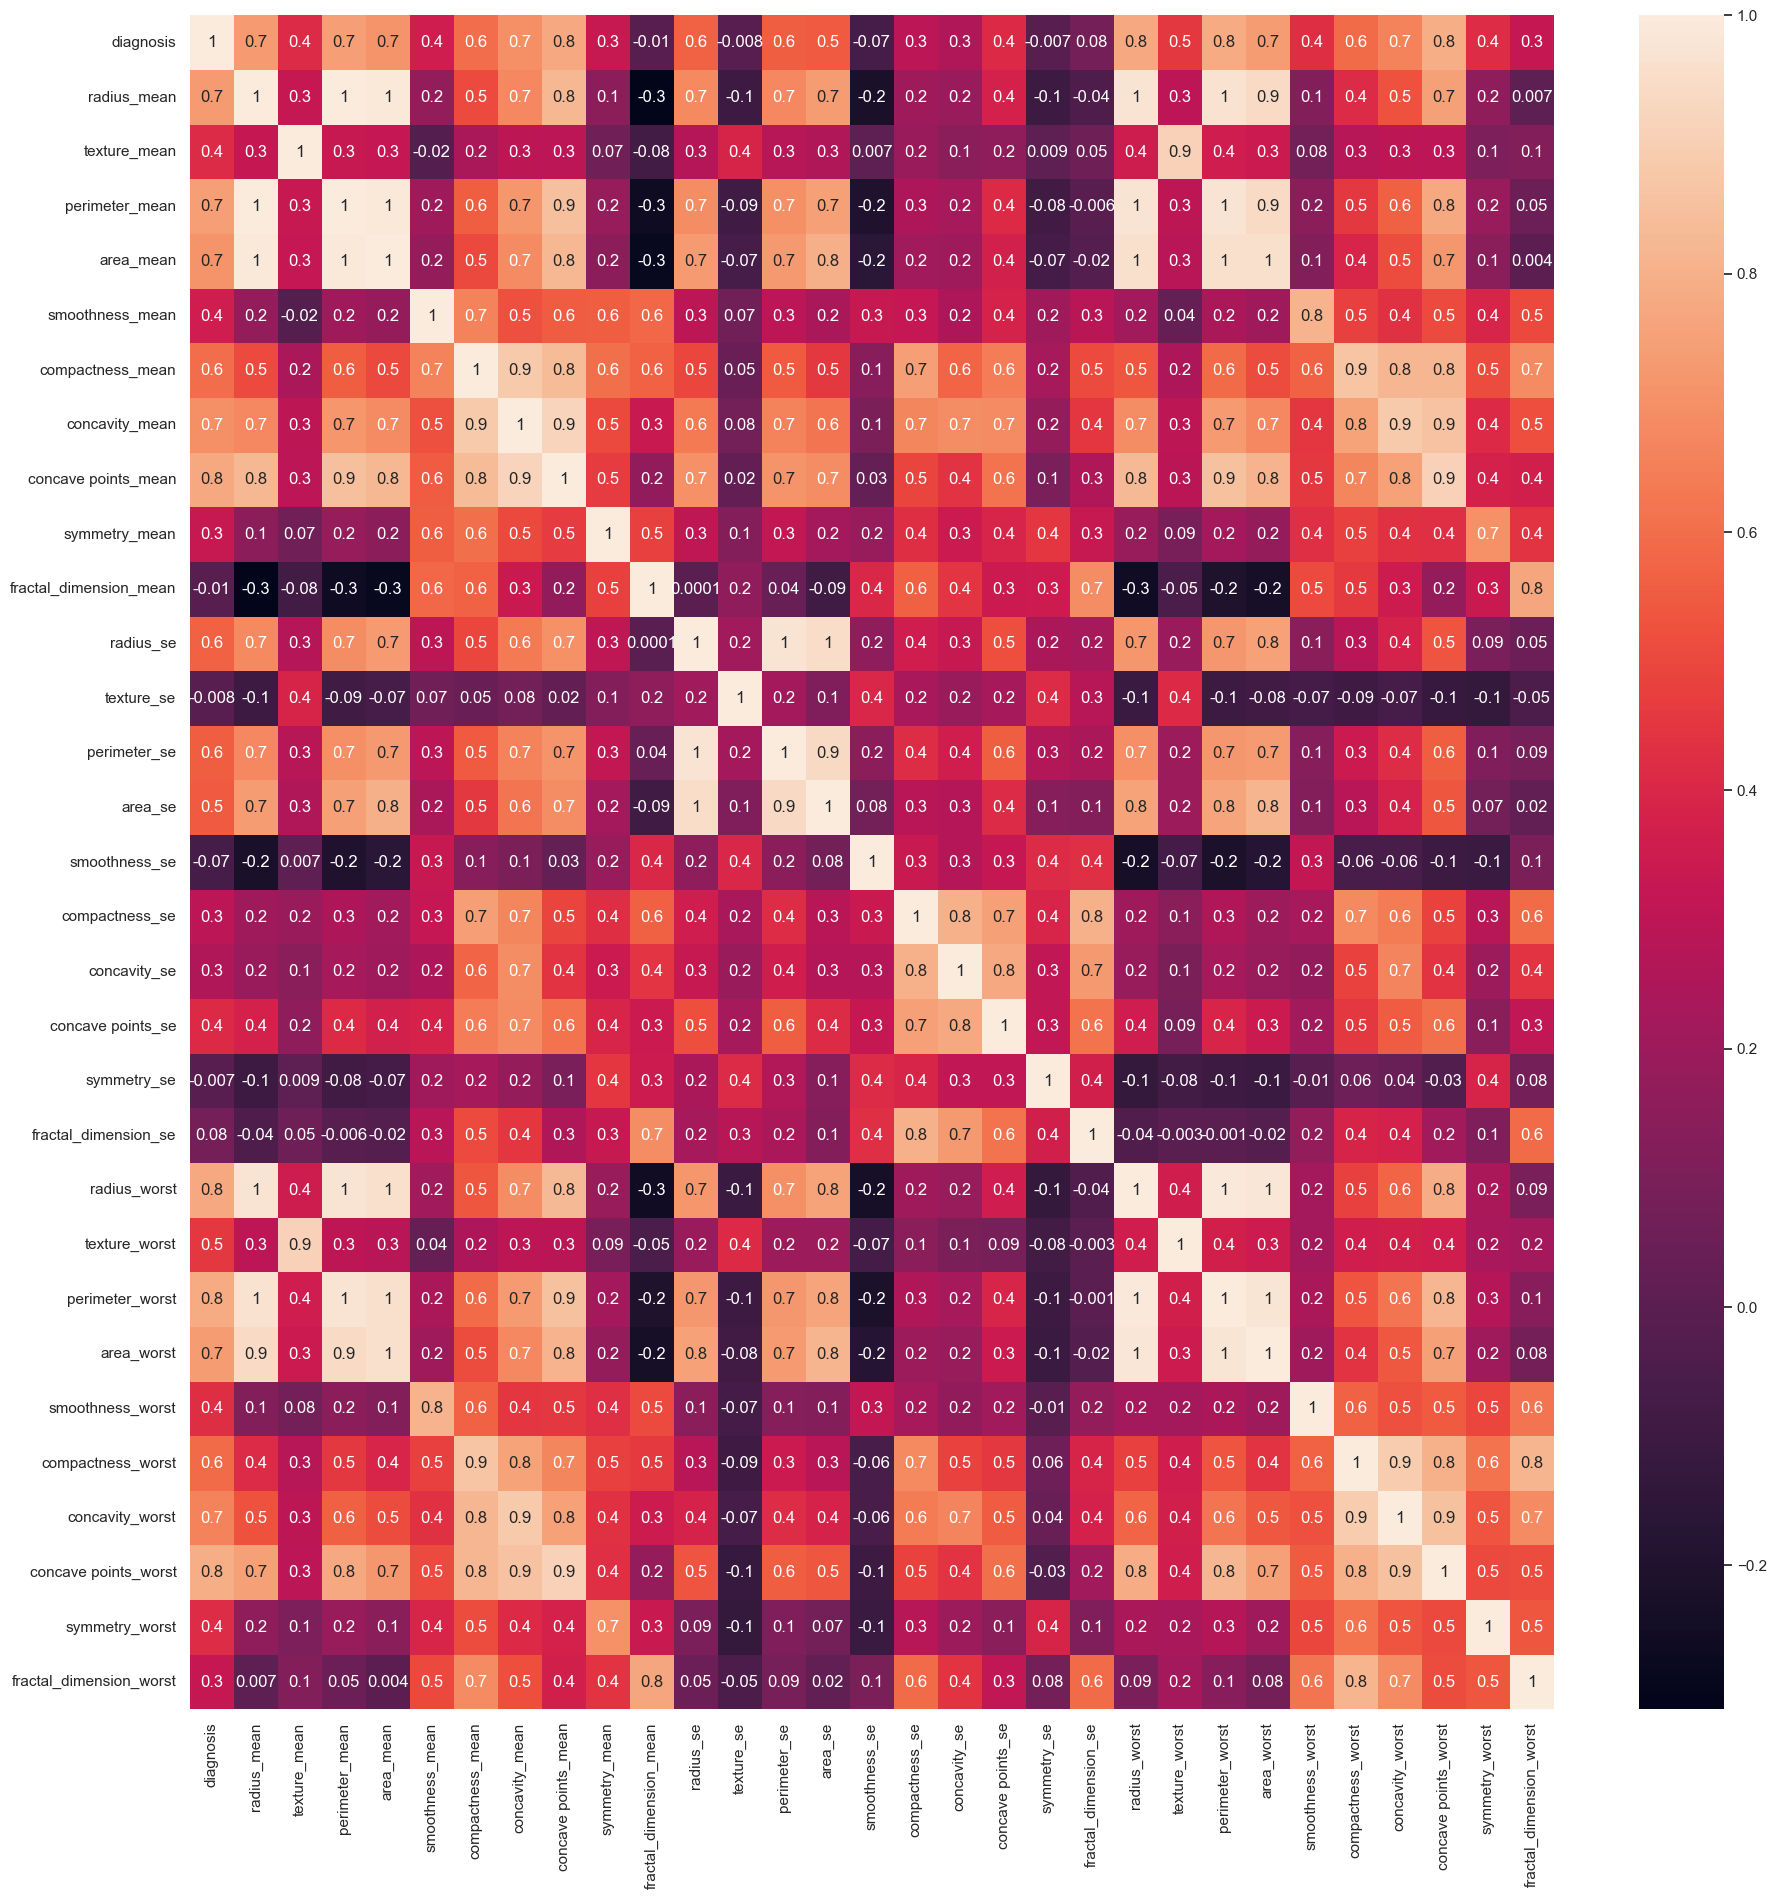

In [56]:
#look at correlation between features

width = 22
height = 22
sns.set(rc = {'figure.figsize':(width,height)})


sns.heatmap(data=df.corr(), annot=True, fmt='.1g')

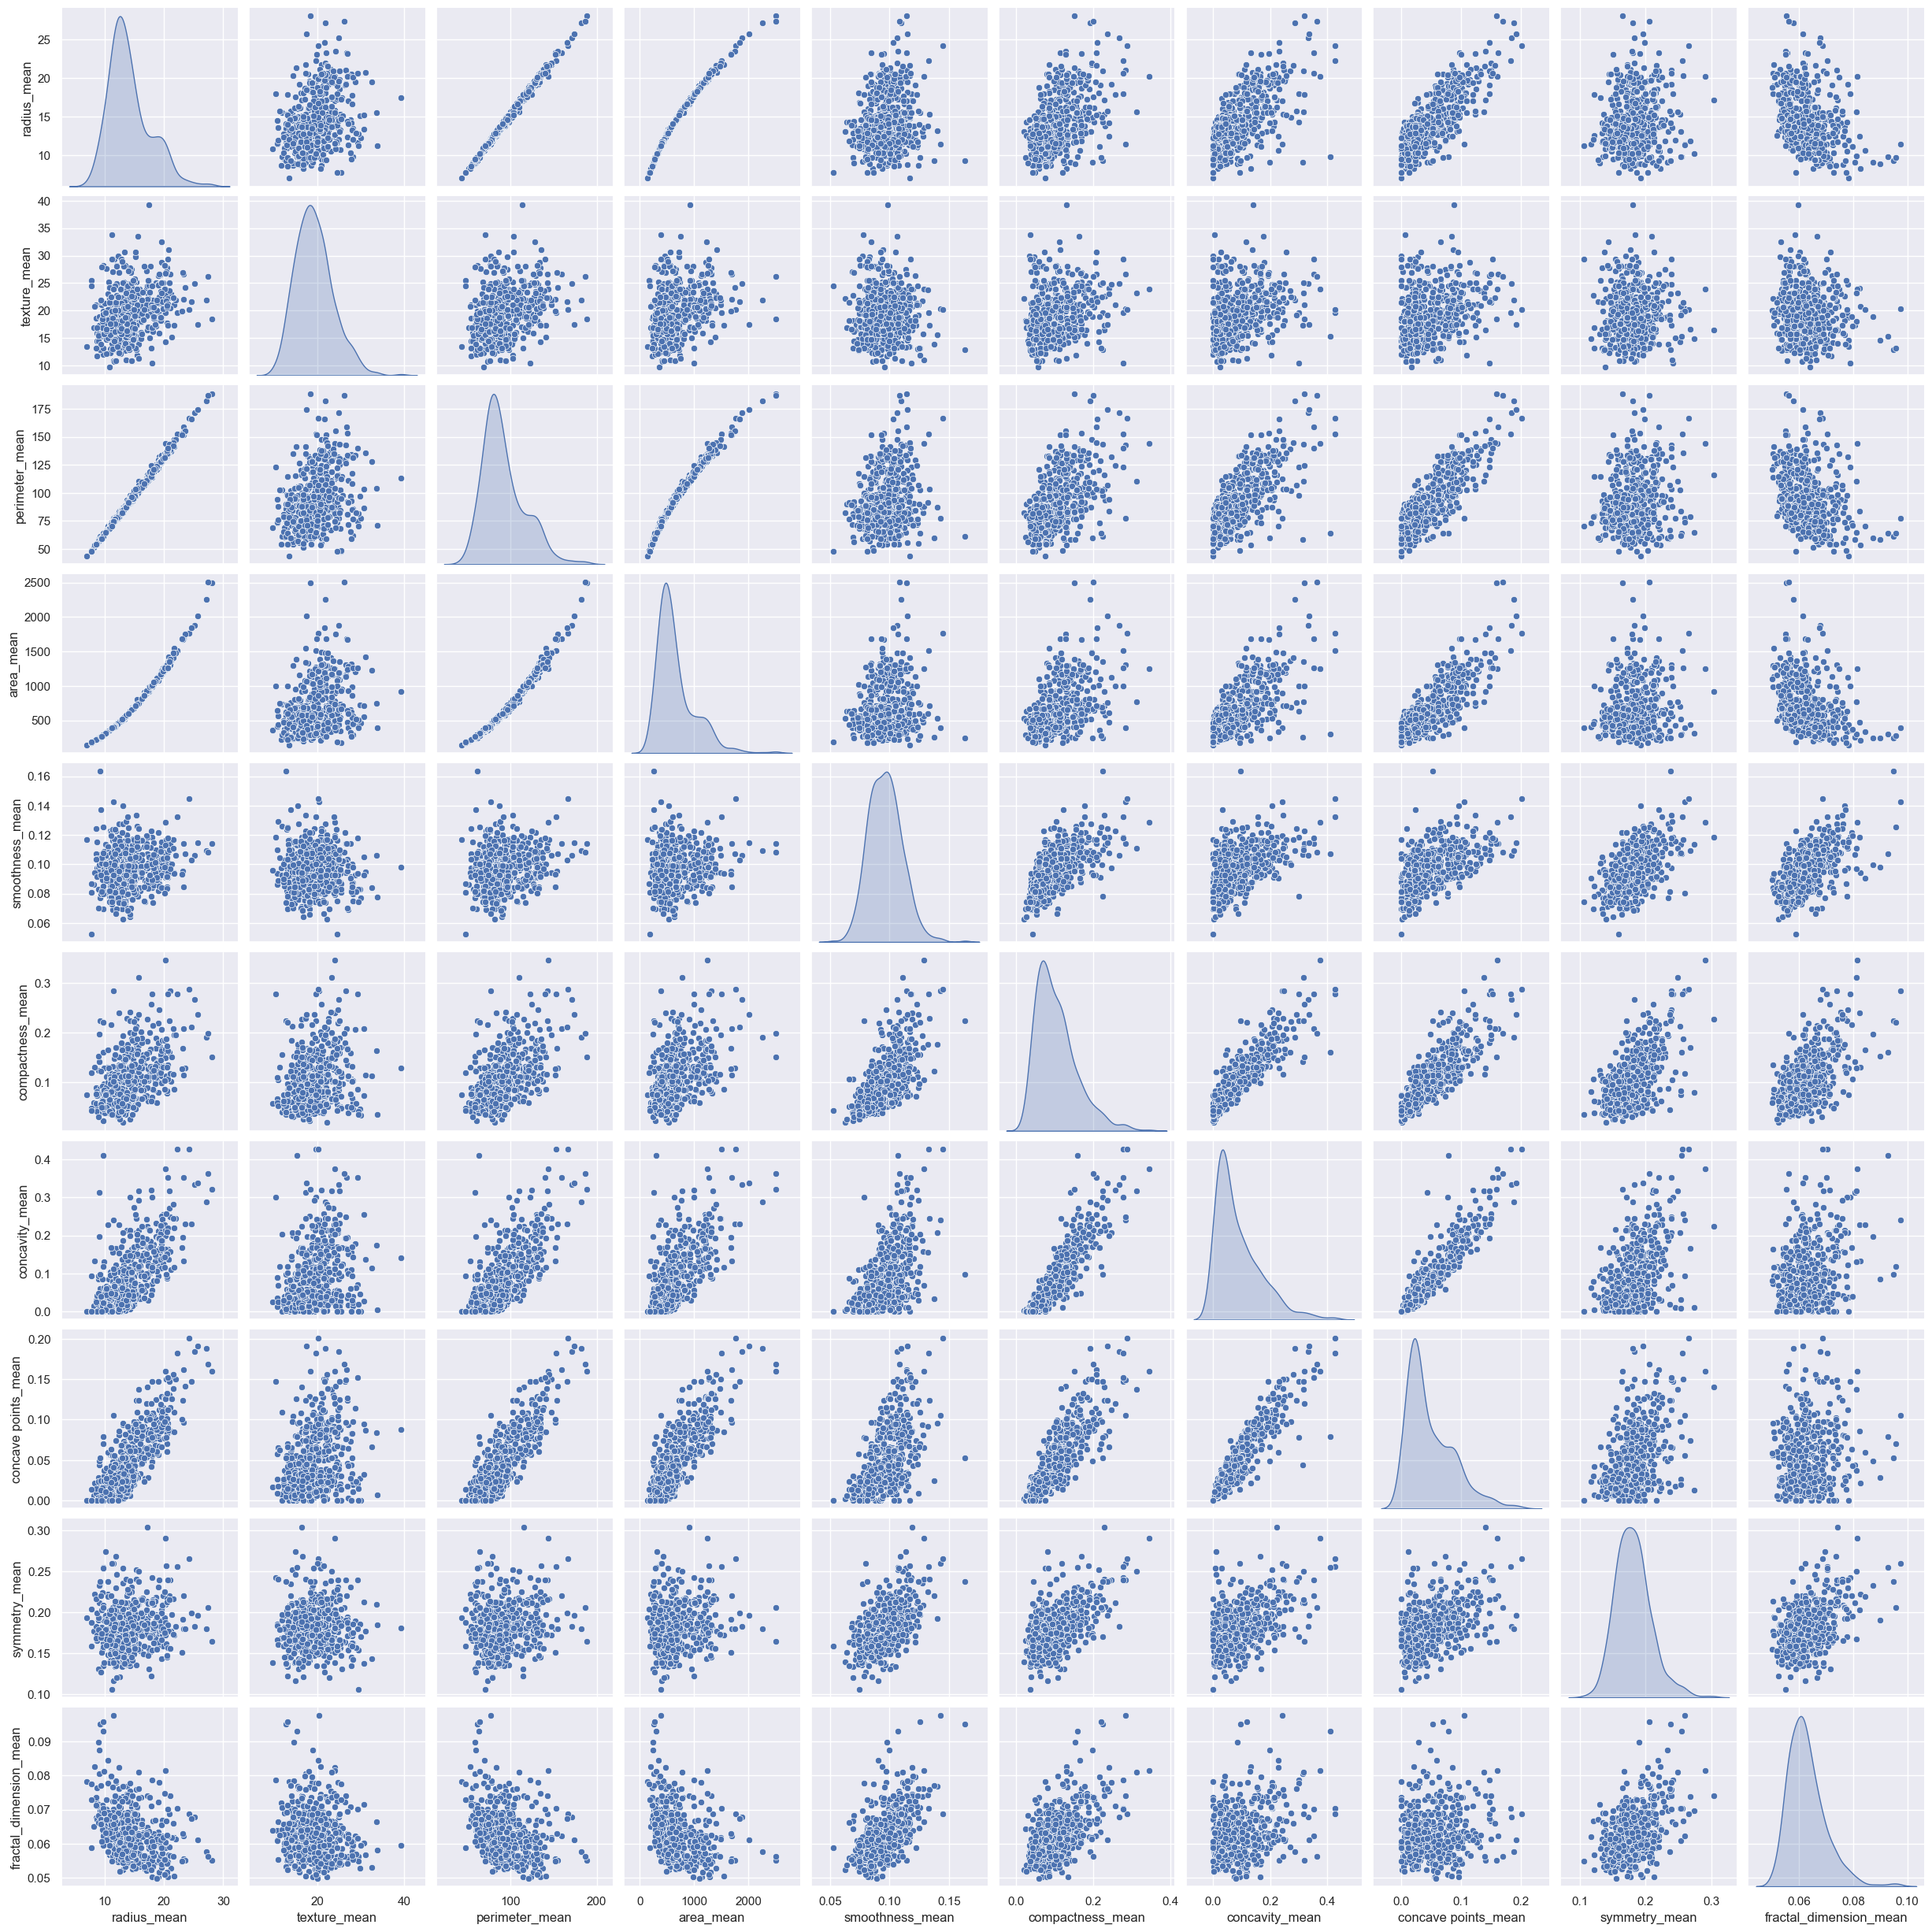

In [57]:
plotdf = df.iloc[: , 1:11]

sns.pairplot(plotdf,
            diag_kind='kde')

### Analyzing the Correlation Heatmap and Pairplot

We can clearly see from the heatmap that there are many features which highly correlate with one another (i.e. correlation is >=.7.) The presense of highly correlated features means that certain models, such as logistic regression, will be ill-suited to working with the full feature set.

For the pairplot, I limited the features to the mean columns to avoid the problem of high correlation. We can see that there appear to be some strong linear relationships between area_mean, radius_mean, and perimeter_mean which can be expected. The fractal_dimension_mean appears to have the least linearity in its relationships to the other features.



# Model Selection & Preprocessing

After exploratory analysis, I concluded that the best classifier models to test would be those that can handle correlated features and excel with medium-sized, dense datasets. I decided that three models that fit those parameters would be an AdaBoost classifier, an XGB classifier, and a Support Vector Machine classifier.

We split the data into a training set and test set with the test set comprising 20% of the original dataset.

In [58]:
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1999)

## Comparing the Models

The metric I focused on for comparing the models is the F1 Score which balances precision and recall in classifier models.

When considering the question of recall vs precision I decided that the potential severity of a false negative outweighs the inconvenience of a false positive so the second metric I focused on was recall. The ideal model should, therefore, perform the best at catching all malignant cells in its predictions even if it means potentially increasing its rate of false positives. Accuracy was also included as another metric to compare.

All hyperparameter tuning will be done using SKlearn's GridSearchCV function which will allow us to use 5-fold cross validation to compare our chosen metric on the training data to find the best performing model.



In [59]:
# Create a Pandas DataFrame to display the Accuracy, Precision, Recall, and
# F1 scores of the models for easy comparison

model_comparison = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1 Score"])

#establish matric for GridSearchCV comparison
score_metric = 'f1'

### Tuning and Fitting the AdaBoost Classifier

The parameter I tuned for the AdaBoost classifer was "n_estimators" in order to find the ideal number of weak learners that, when combined, give the best f1 score.

In [60]:
#AdaBoost Classifier

random_state = 1999
ada_params = {
    'n_estimators' : range(20, 201)
}

AdaCLF = AdaBoostClassifier(random_state=random_state)

#Hyperparameter tuning to determine best Adaboost Estimator
#Speed up the tuning process by assigning all processors to n_jobs
ada_clf = GridSearchCV(AdaCLF, ada_params, n_jobs=-1, scoring=score_metric)
ada_clf.fit(X_train, y_train)

ada_clf_results = pd.DataFrame(ada_clf.cv_results_)
ada_best_model = ada_clf.best_estimator_


[Text(0.5, 1.0, 'Tuning n_estimators'),
 Text(0.5, 0, 'n_estimators'),
 Text(0, 0.5, 'F1 Score')]

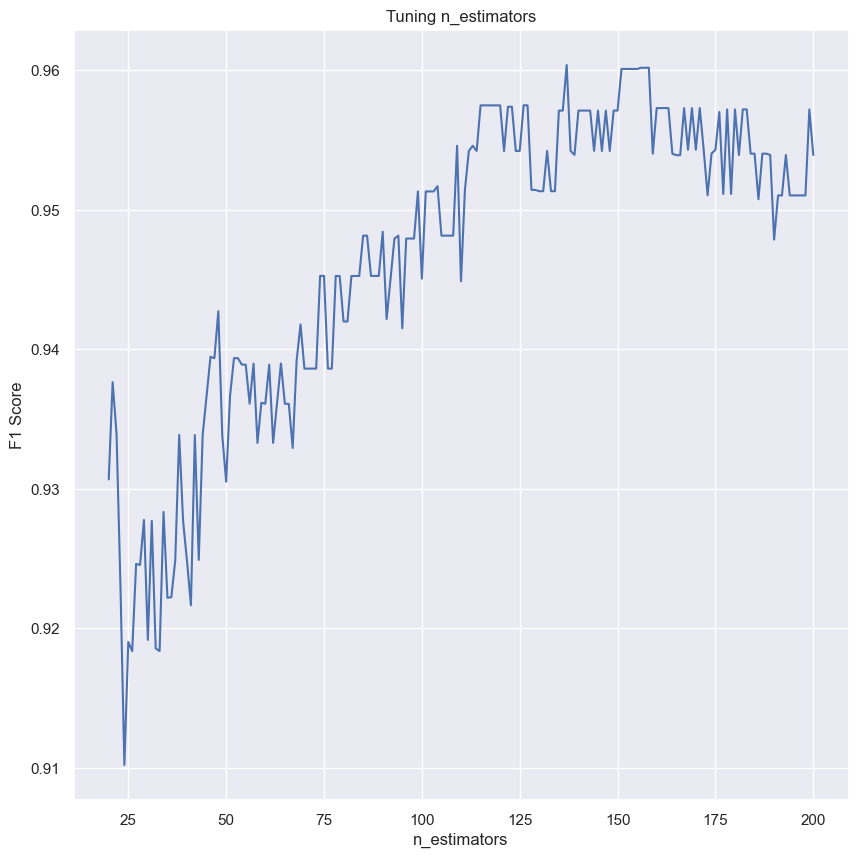

In [61]:

width = 10
height = 10
sns.set(rc = {'figure.figsize':(width,height)})

sns.lineplot(x="param_n_estimators", y="mean_test_score", data=ada_clf_results).set(title='Tuning n_estimators', xlabel="n_estimators", ylabel="F1 Score")

### Reviewing the AdaBoost model Tuning

As can be seen in the chart above, the mean F1 score for the AdaBoost steadily rose when increasing the number of weak learners past 25 until achieving a height at 137.



### Tuning and Fitting XGBoost Classifier

The parameters I tuned for the XGBoost classifer were max_depth, learning_rate, and n_estimators.

In [62]:
xbg_params = {
    'max_depth' : [1, 5, 10, 15],
    'learning_rate':  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': range(20, 101)
}

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1999)

#Hyperparameter tuning to determine best Adaboost Estimator
xgb_clf = GridSearchCV(xgb_model, xbg_params, n_jobs=-1, scoring=score_metric)
xgb_clf.fit(X_train, y_train)



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1999, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_depth': [1, 5, 10, 15],
                         'n_estimators': range(20, 101)},
             scoring='f1')

In [63]:
xgb_clf_results = pd.DataFrame(xgb_clf.cv_results_)

xgb_best_clf = xgb_clf.best_estimator_

[Text(0.5, 1.0, 'Tuning n_estimators'),
 Text(0.5, 0, 'n_estimators'),
 Text(0, 0.5, 'F1 Score')]

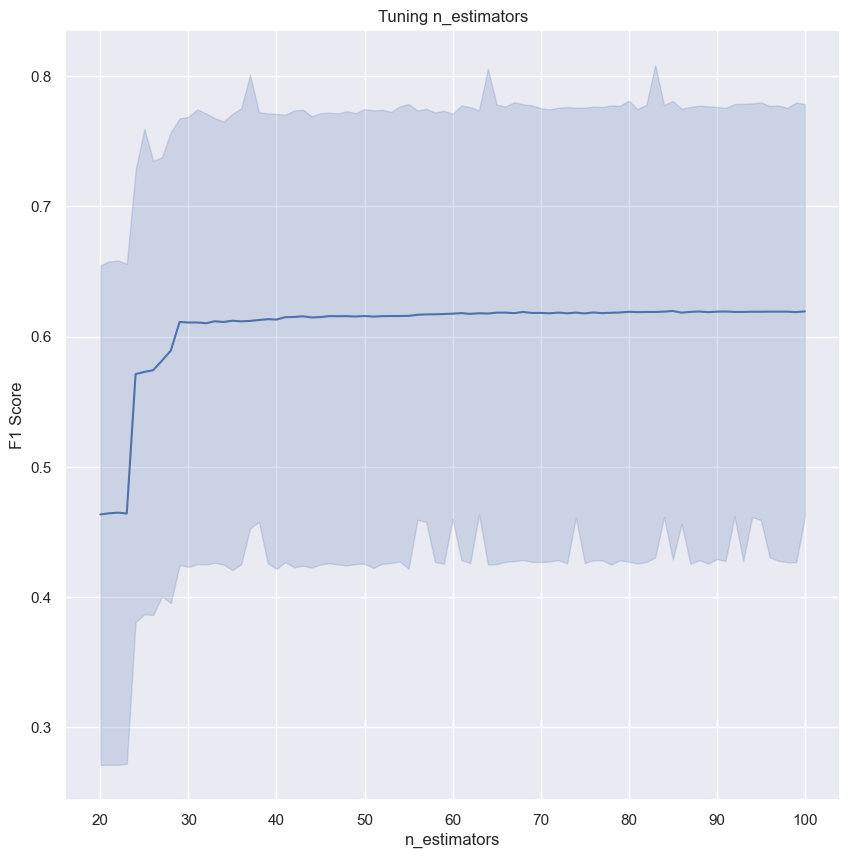

In [64]:

sns.set(rc = {'figure.figsize':(width,height)})
sns.lineplot(x="param_n_estimators", y="mean_test_score", data=xgb_clf_results).set(title='Tuning n_estimators', xlabel="n_estimators", ylabel="F1 Score")


[Text(0.5, 1.0, 'Tuning Max Depth'),
 Text(0.5, 0, 'max_depth'),
 Text(0, 0.5, 'F1 Score')]

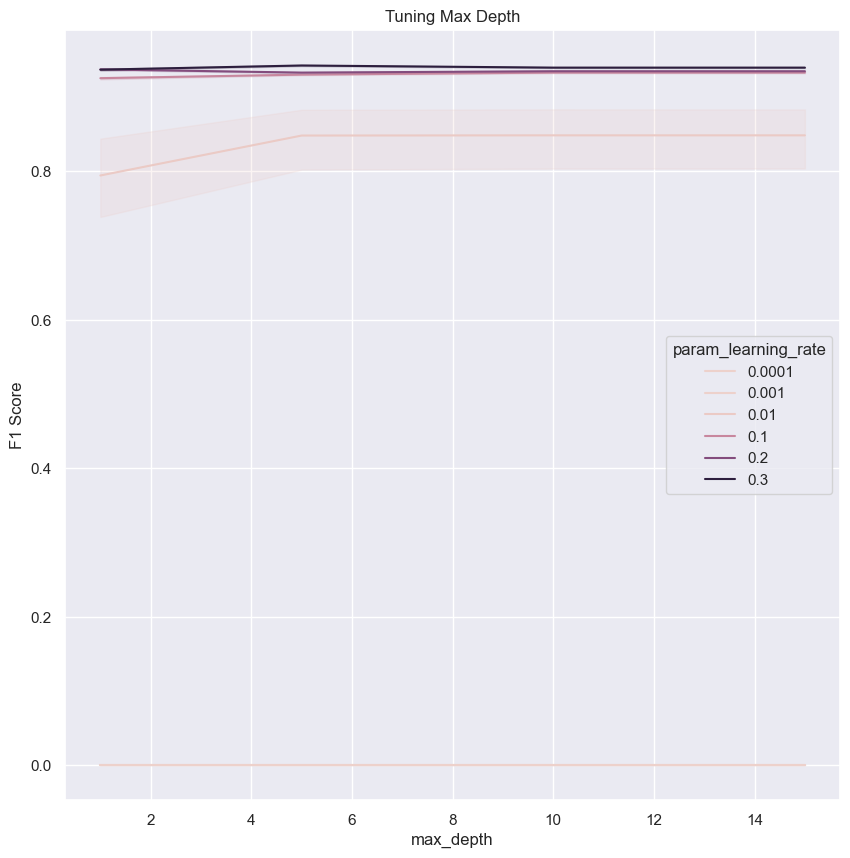

In [65]:

sns.set(rc = {'figure.figsize':(width,height)})
sns.lineplot(x="param_max_depth", y="mean_test_score", hue="param_learning_rate", data=xgb_clf_results).set(title="Tuning Max Depth", xlabel="max_depth", ylabel="F1 Score")

### Reviewing the XGBoost model Tuning

As can be seen in the first chart above, the mean F1 score steadily rose with the number of estimators until approximately 27 were reached and then it plateaued.

The second chart shows that the .3 learning rate consistently performed well with the best max_depth occurring aroung 5.

### Tuning and Fitting the SVM

The hyperparameters I tuned for the Support Vector Machine classifier are the kernel, in order to determine the best splits considering the dataset, and the C parameter which helps control the slack.

In [66]:
svc_params = {
  'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
  'C': np.arange(.01, 5, .01)
}

svc_model = SVC(random_state=1999)

#Hyperparameter tuning to determine best Adaboost Estimator
svc_clf = GridSearchCV(svc_model, svc_params,  n_jobs=-1, scoring=score_metric)
svc_clf.fit(X_train, y_train)

svc_best = svc_clf.best_estimator_

svc_results = pd.DataFrame(svc_clf.cv_results_)

[Text(0.5, 1.0, 'Kernel and C Parameter Tuning'),
 Text(0.5, 0, 'C Parameter'),
 Text(0, 0.5, 'F1 Score')]

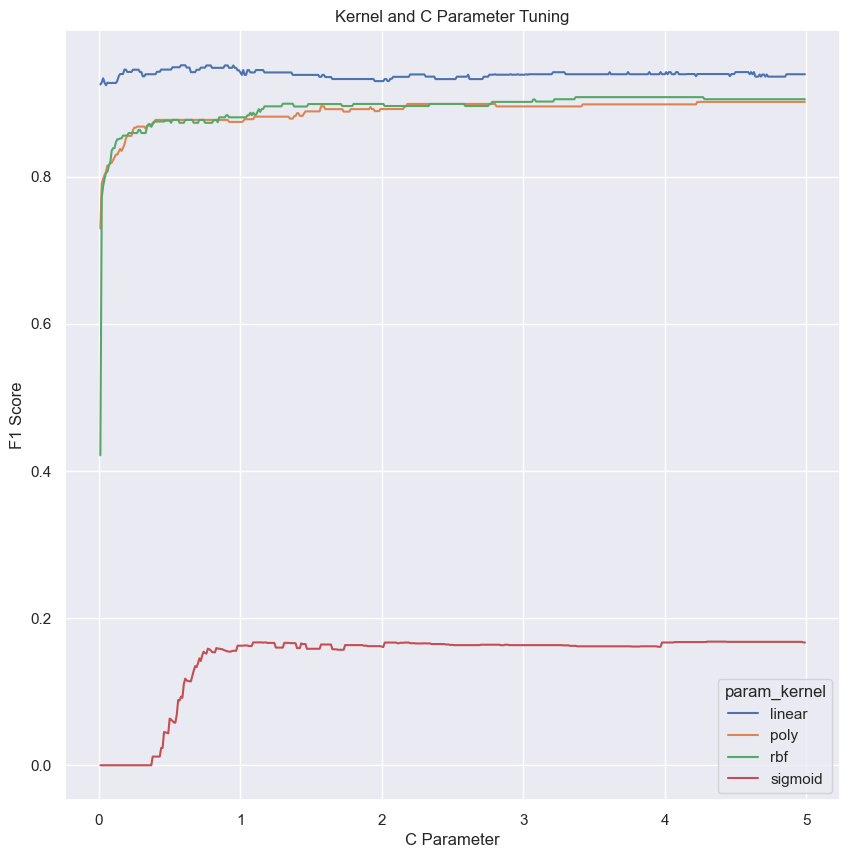

In [67]:
sns.set(rc = {'figure.figsize':(width,height)})

sns.lineplot(x="param_C", y="mean_test_score", hue="param_kernel", data=svc_results).set(title="Kernel and C Parameter Tuning", xlabel="C Parameter", ylabel="F1 Score")

### Reviewing the SVM model Tuning

As can be seen in the chart above, the linear kernel consistently performed the best on the training data. Given the linear kernel, the C parameter performed best at approxiamtely $0.58$.

## Comparing the Models on the Test Set

The dataframe below shows the accuracy, precision, recall, and F1 score on the test data for each of our tuned models.

In [68]:
#Fit the AdaBoost model to the test set and calculate performance metrics

ADA_precision, ADA_recall, ADA_f1score, _ = precision_recall_fscore_support(y_test, ada_best_model.predict(X_test), average='binary')
ADA_accuracy = ada_best_model.score(X_test, y_test)
print("Accuracy: ", ADA_accuracy)
print("Precision: ", ADA_precision)
print("Recall: ", ADA_recall)
print("F1 Score: ", ADA_f1score)

model_comparison.loc['AdaBoost'] = [ADA_accuracy, ADA_precision, ADA_recall, ADA_f1score]

Accuracy:  0.9649122807017544
Precision:  1.0
Recall:  0.9090909090909091
F1 Score:  0.9523809523809523


In [69]:
#Fit the XGBoost model to the test set and calculate performance metrics

XGB_precision, XGB_recall, XGB_f1score, _ = precision_recall_fscore_support(y_test, xgb_best_clf.predict(X_test), average='binary')

XGB_accuracy = xgb_best_clf.score(X_test, y_test)
print("Accuracy: ", XGB_accuracy)
print("Precision: ", XGB_precision)
print("Recall: ", XGB_recall)
print("F1 Score: ", XGB_f1score)

model_comparison.loc['XGBoost'] = [XGB_accuracy, XGB_precision, XGB_recall, XGB_f1score]

Accuracy:  0.9473684210526315
Precision:  0.9318181818181818
Recall:  0.9318181818181818
F1 Score:  0.9318181818181818


In [70]:
#Fit the SVM model to the test set and calculate performance metrics

svm_precision, svm_recall, svm_f1score, _ = precision_recall_fscore_support(y_test, svc_best.predict(X_test), average='binary')

svm_accuracy = svc_best.score(X_test, y_test)
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1 Score: ", svm_f1score)

model_comparison.loc['SVM'] = [svm_accuracy, svm_precision, svm_recall, svm_f1score]

Accuracy:  0.9385964912280702
Precision:  0.9512195121951219
Recall:  0.8863636363636364
F1 Score:  0.9176470588235294


In [71]:
model_comparison.sort_values('F1 Score', ascending=False)

,Accuracy,Precision,Recall,F1 Score
AdaBoost,0.964912,1.000000,0.909091,0.952381
XGBoost,0.947368,0.931818,0.931818,0.931818
SVM,0.938596,0.951220,0.886364,0.917647


The F1 score was the metric that the hyperparameter tuning maximized as it can be considered a balance of precision and recall.

The model that returned the best F1 score was the AdaBoost model with an F1 score of $.952$. The XGBoost returned the second best F1 score of $0.932$. The SVM both returned a score of approximately $.918$

While the F1 score is an important balance metric between precision and recall, the model with the highest recall metric was the XGBoost model with a score of $0.932$ while the AdaBoost model only achieved a score of $0.909$. The SVM performed significantly worse with a score of $0.886$.

The Adaboost model has a perfect precision score of $1.0$ meaning whenever it predicted that a mass was malignant it was always correct. It is unlikely that the model would maintain a perfect precision score when testing on new data but it does suggest that it's precision is particularly high, especially in comparison to the other models.

Finally, the AdaBoost model had the highest accuracy score of $.965$ which measures the sum of true positives and true negatives divided by the entire dataset. The XGBoost model had the second highest accuracy at $0.934$ while the SVM had the lowest at $0.939$. 

# Conclusions

Based on the above results we can conclude that it is possible to train an ensemble decision tree classifier on the Breast Cancer Wisconsin (Diagnostic) dataset in order to reliably predict whether a breast mass is malignant given features of the cells extracted from imaging. The ability to predict malignancy of a mass based just on imaging can ultimately aid in early diagnosis and treatment of a serious disease.

The two decision tree classifiers, AdaBoost and XGBoost, performed the best of the three models trained on the dataset with AdaBoost having the highest final F1 Score of $0.9524$. However, The XGBoost model had a fairly close F1 Score of $0.932$ and a better recall score by nearly $.02$. Given the importance of recall for our models, which aim to help diagnose potential malignant breast masses as early as possible, I am inclined to suggest that the overall best performing model is the XGBoost model since its lower precision is more than made up for with its higher recall. 

I believe that further improvements to the performance of the model could likely be achieved with more samples. While the samples provided in the dataset used were fairly robust at a total size of 569, an increase in samples would still help the model to better capture relationships between the features and target that would ultimately improve performance. 